
Package: https://github.com/masrb/Semantic-Role-Labeling-allenNLP-  
Reference paper: https://link.springer.com/article/10.1007/s13278-024-01233-w

AllenNLP uses PropBank Annotation. As a result,each verb sense has numbered arguments e.g., ARG-0, ARG-1,

ARG-0 is usually PROTO-AGENT -> Agent/causer of a verb

ARG-1 is usually PROTO-PATIENT -> Target of a verb

ARG-2 is usually benefactive, instrument, attribute

ARG-3 is usually start point, benefactive, instrument, attribute

ARG-4 is usually end point (e.g., for move or push style verbs)



In [1]:
# Uninstall conflicting packages
!pip uninstall -y torch torchvision torchaudio torchtext sqlalchemy typing-extensions pydantic pydantic-core spacy en-core-web-sm inflect

# Install the latest version of PyTorch
!pip install torch torchvision

# Install the newest version of AllenNLP and AllenNLP models
!pip install allennlp allennlp-models

# Install other required packages
!pip install spacy==3.3.3 inflect==5.3.0

# Download and install the compatible version of the Spacy model
!python -m spacy download en_core_web_sm

# Install SQLAlchemy if needed
!pip install sqlalchemy==1.4.46


Found existing installation: torch 2.3.0+cu121
Uninstalling torch-2.3.0+cu121:
  Successfully uninstalled torch-2.3.0+cu121
Found existing installation: torchvision 0.18.0+cu121
Uninstalling torchvision-0.18.0+cu121:
  Successfully uninstalled torchvision-0.18.0+cu121
Found existing installation: torchaudio 2.3.0+cu121
Uninstalling torchaudio-2.3.0+cu121:
  Successfully uninstalled torchaudio-2.3.0+cu121
Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0
Found existing installation: SQLAlchemy 2.0.31
Uninstalling SQLAlchemy-2.0.31:
  Successfully uninstalled SQLAlchemy-2.0.31
Found existing installation: typing_extensions 4.12.2
Uninstalling typing_extensions-4.12.2:
  Successfully uninstalled typing_extensions-4.12.2
Found existing installation: pydantic 2.7.4
Uninstalling pydantic-2.7.4:
  Successfully uninstalled pydantic-2.7.4
Found existing installation: pydantic_core 2.18.4
Uninstalling pydantic_core-2.18.4:
  

# Application to Lexisnexis data
- Based on: https://link.springer.com/article/10.1007/s13278-024-01233-w
- Right now, there seems to be a problem with very long sentences -> therefore start with subset of data (also for time reasons).

In [2]:
import spacy
from spacy import displacy
from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/

Mounted at /content/drive
MyDrive


In [4]:
SRL_MODEL_PATH = "https://storage.googleapis.com/allennlp-public-models/structured-prediction-srl-bert.2020.12.15.tar.gz"
predictor = Predictor.from_path(SRL_MODEL_PATH)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Current status quo

import pandas as pd
import nltk
from tqdm import tqdm
from transformers import BertTokenizer # for avoiding this error: RuntimeError: The size of tensor a (843) must match the size of tensor b (512) at non-singleton dimension 1
nltk.download('punkt')

# Read the CSV file
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
df = pd.read_csv(path_to_csv)

# Extract the "Article_Text" column for the first 5 entries
#df_subset = df['Article_Text'].head(2000)

# Print the DataFrame of articles
#print("Original articles:")
#print(df_subset)

# Load the file with the info on top topic per document.
path_to_df_top = '/content/drive/MyDrive/Colab Notebooks/topic_model_3_k20_srl_2.csv'
df_top = pd.read_csv(path_to_df_top)

# Merge the datasets based on id column
df = df.merge(df_top, left_on='Unnamed: 0.1', right_on='Unnamed: 0.1', how='left')
#df.set_index('Unnamed: 0.1', inplace=True)

print("Merged DataFrame:")
print(df.head())


## Now just filter out the topics of interest: This is just a test

topics_of_interest = ["Mining market dynamics", "Stopwords/False Positives 1", "Stopwords/False Positives 1", "Indian South Africans history", "Coal transport"]
df = df[~df['Dominant Topic'].isin(topics_of_interest)] # is not it



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Merged DataFrame:
   Unnamed: 0.1  Unnamed: 0  \
0             2         168   
1             3         261   
2             4         263   
3             5         360   
4             6         361   

                                        Jurisdiction  Location ContentType  \
0                                      International       NaN        News   
1                                      International       NaN        News   
2  U.S. Federal; International; Massachusetts; Wa...       NaN        News   
3                                      International       NaN        News   
4                                      International       NaN        News   

            Byline  WordLength  WebNewsUrl  Geography  NegativeNews  ...  \
0              NaN        1860         NaN        NaN           NaN  ...   
1     Ingi Salgado         700         NaN        NaN           NaN  ...   
2     Patrick Bond        1768         NaN        NaN           NaN  ...   
3  Eleanor Momberg    

In [ ]:
df_subset = df['Article_Text'].head(200)

# Initialize an empty list to store sentences
sentences = []

# Tokenizer for checking sentence length
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to truncate sentences
def truncate_sentence(sentence, max_length=50):
    words = sentence.split()
    if len(words) > max_length:
        sentence = ' '.join(words[:max_length])
    return sentence

# Iterate over the text of the articles
for text in df_subset:
    # Split the text into sentences using NLTK's sent_tokenize function
    text_sentences = nltk.sent_tokenize(text)
    # Check each sentence for the presence of the word "coal"
    for sentence in text_sentences:
        # Convert the sentence to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()
        # Check if the sentence contains the word "coal"
        if "coal" in sentence_lower:
            truncated_sentence = truncate_sentence(sentence)
            sentences.append(truncated_sentence)


# I already defined the predictor

# Function to predict semantic roles
def predict_srl(sentences):
    predictions = []
    # tqdm used for progress bar
    for sentence in tqdm(sentences, desc="Predicting"):
        pred = predictor.predict(sentence=sentence)
        predictions.append(pred)
    return predictions

# Run prediction
predictions = predict_srl(sentences)

# Create an empty list to store the data
data = []

for sentence, prediction in zip(sentences, predictions):
    sentence_text = sentence
    for verb in prediction['verbs']:
        verb_text = verb['verb']
        arg0_words = []
        arg1_words = []
        arguments = []
        for i, (tag, description) in enumerate(zip(verb['tags'], sentence_text.split())):
            if tag.startswith('B-ARG0') or (arg0_words and tag.startswith('I-ARG0')):
                arg0_words.append(description)
            elif tag.startswith('B-ARG1') or (arg1_words and tag.startswith('I-ARG1')):
                arg1_words.append(description)
            if tag != 'O':
                arguments.append(f"{tag}: {description}")
        arg0_word = ' '.join(arg0_words) if arg0_words else None
        arg1_word = ' '.join(arg1_words) if arg1_words else None
        data.append([sentence_text, verb_text, arg0_word, arg1_word, ' '.join([f"{tag}: {word}" for tag, word in zip(verb['tags'], sentence_text.split())])])

# Create a DataFrame from the data list
df_srl = pd.DataFrame(data, columns=['Sentence', 'Verb', 'Agent', 'Target', 'Arguments'])

# Export the DataFrame as a CSV file
df_srl.to_csv('/content/drive/MyDrive/Colab Notebooks/srl_predictions_dtm_top_topic.csv', index=False)

# Display the DataFrame
print(df_srl.head(20))

Predicting: 100%|██████████| 453/453 [07:37<00:00,  1.01s/it]

                                             Sentence         Verb  \
0   Then to swim out beyond the breakers, the sea ...         swim   
1   Then to swim out beyond the breakers, the sea ...      thinned   
2   Then to swim out beyond the breakers, the sea ...     floating   
3   Then to swim out beyond the breakers, the sea ...           is   
4   Then to swim out beyond the breakers, the sea ...     remarked   
5   Environmental groups rejected the dominance of...     rejected   
6   Environmental groups rejected the dominance of...     designed   
7   Environmental groups rejected the dominance of...        avoid   
8   Environmental groups rejected the dominance of...     bringing   
9   Environmental groups rejected the dominance of...       called   
10  "We\'re confident this will prove more cost-ef...       We\'re   
11  "We\'re confident this will prove more cost-ef...         will   
12  "We\'re confident this will prove more cost-ef...        prove   
13  "We\'re confiden

In [ ]:
import pandas as pd
import nltk
from tqdm import tqdm
from transformers import BertTokenizer
from collections import Counter

nltk.download('punkt')

# Read the CSV file
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
df = pd.read_csv(path_to_csv)

# Load the file with the info on top topic per document.
path_to_df_top = '/content/drive/MyDrive/Colab Notebooks/topic_model_3_k20_srl_2.csv'
df_top = pd.read_csv(path_to_df_top)

# Merge the datasets based on id column
df = df.merge(df_top, left_on='Unnamed: 0.1', right_on='Unnamed: 0.1', how='left')

print("Merged DataFrame:")
print(df.head())

# Filter out the "Article_Text" and "Dominant Topic" columns for the first 200 entries
df_subset = df[['Article_Text', 'Dominant Topic']].head(200)

# Initialize an empty list to store sentences and their topics
sentences_with_topics = []

# Tokenizer for checking sentence length
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to truncate sentences
def truncate_sentence(sentence, max_length=50):
    words = sentence.split()
    if len(words) > max_length:
        sentence = ' '.join(words[:max_length])
    return sentence

# Iterate over the text and topics of the articles
for text, topic in df_subset.itertuples(index=False):
    # Split the text into sentences using NLTK's sent_tokenize function
    text_sentences = nltk.sent_tokenize(text)
    # Check each sentence for the presence of the word "coal"
    for sentence in text_sentences:
        # Convert the sentence to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()
        # Check if the sentence contains the word "coal"
        if "coal" in sentence_lower:
            truncated_sentence = truncate_sentence(sentence)
            sentences_with_topics.append((truncated_sentence, topic))

# I already defined the predictor

# Function to predict semantic roles
def predict_srl(sentences):
    predictions = []
    # tqdm used for progress bar
    for sentence, _ in tqdm(sentences, desc="Predicting"):
        pred = predictor.predict(sentence=sentence)
        predictions.append(pred)
    return predictions

# Run prediction
predictions = predict_srl(sentences_with_topics)

# Create an empty list to store the data
data = []

for (sentence, topic), prediction in zip(sentences_with_topics, predictions):
    sentence_text = sentence
    for verb in prediction['verbs']:
        verb_text = verb['verb']
        arg0_words = []
        arg1_words = []
        arguments = []
        for i, (tag, description) in enumerate(zip(verb['tags'], sentence_text.split())):
            if tag.startswith('B-ARG0') or (arg0_words and tag.startswith('I-ARG0')):
                arg0_words.append(description)
            elif tag.startswith('B-ARG1') or (arg1_words and tag.startswith('I-ARG1')):
                arg1_words.append(description)
            if tag != 'O':
                arguments.append(f"{tag}: {description}")
        arg0_word = ' '.join(arg0_words) if arg0_words else None
        arg1_word = ' '.join(arg1_words) if arg1_words else None
        data.append([sentence_text, verb_text, arg0_word, arg1_word, ' '.join([f"{tag}: {word}" for tag, word in zip(verb['tags'], sentence_text.split())]), topic])

# Create a DataFrame from the data list
df_srl = pd.DataFrame(data, columns=['Sentence', 'Verb', 'Agent', 'Target', 'Arguments', 'Dominant Topic'])

# Calculate the most common verbs per agent
agent_verbs = df_srl[df_srl['Agent'].notnull()].groupby(['Agent', 'Verb']).size().reset_index(name='Count')
agent_counts = df_srl['Agent'].value_counts().reset_index()
agent_counts.columns = ['Agent', 'Agent_Count']
agent_verbs = agent_verbs.merge(agent_counts, on='Agent')
#most_common_verbs_per_agent = agent_verbs.sort_values(['Agent', 'Count'], ascending=[True, False])
most_common_verbs_per_agent = agent_verbs.sort_values(['Agent_Count', 'Count'], ascending=[False, False])

# Calculate the most common verbs per target
target_verbs = df_srl[df_srl['Target'].notnull()].groupby(['Target', 'Verb']).size().reset_index(name='Count')
target_counts = df_srl['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Target_Count']
target_verbs = target_verbs.merge(target_counts, on='Target')
#most_common_verbs_per_target = target_verbs.sort_values(['Target', 'Count'], ascending=[True, False])
most_common_verbs_per_target = target_verbs.sort_values(['Target_Count', 'Count'], ascending=[False, False])



# Export the DataFrame and statistics as CSV files
df_srl.to_csv('/content/drive/MyDrive/Colab Notebooks/srl_predictions_dtm_top_topic2.csv', index=False)
most_common_verbs_per_agent.to_csv('/content/drive/MyDrive/Colab Notebooks/most_common_verbs_per_agent2.csv', index=False)
most_common_verbs_per_target.to_csv('/content/drive/MyDrive/Colab Notebooks/most_common_verbs_per_target2.csv', index=False)

# Display the DataFrames
print("SRL DataFrame:")
print(df_srl.head(20))
print("\nMost Common Verbs per Agent:")
print(most_common_verbs_per_agent.head(20))
print("\nMost Common Verbs per Target:")
print(most_common_verbs_per_target.head(20))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Merged DataFrame:
   Unnamed: 0.1  Unnamed: 0  \
0             2         168   
1             3         261   
2             4         263   
3             5         360   
4             6         361   

                                        Jurisdiction  Location ContentType  \
0                                      International       NaN        News   
1                                      International       NaN        News   
2  U.S. Federal; International; Massachusetts; Wa...       NaN        News   
3                                      International       NaN        News   
4                                      International       NaN        News   

            Byline  WordLength  WebNewsUrl  Geography  NegativeNews  ...  \
0              NaN        1860         NaN        NaN           NaN  ...   
1     Ingi Salgado         700         NaN        NaN           NaN  ...   
2     Patrick Bond        1768         NaN        NaN           NaN  ...   
3  Eleanor Momberg    

Predicting: 100%|██████████| 453/453 [07:11<00:00,  1.05it/s]


SRL DataFrame:
                                             Sentence         Verb  \
0   Then to swim out beyond the breakers, the sea ...         swim   
1   Then to swim out beyond the breakers, the sea ...      thinned   
2   Then to swim out beyond the breakers, the sea ...     floating   
3   Then to swim out beyond the breakers, the sea ...           is   
4   Then to swim out beyond the breakers, the sea ...     remarked   
5   Environmental groups rejected the dominance of...     rejected   
6   Environmental groups rejected the dominance of...     designed   
7   Environmental groups rejected the dominance of...        avoid   
8   Environmental groups rejected the dominance of...     bringing   
9   Environmental groups rejected the dominance of...       called   
10  "We\'re confident this will prove more cost-ef...       We\'re   
11  "We\'re confident this will prove more cost-ef...         will   
12  "We\'re confident this will prove more cost-ef...        prove   
13  "

In [ ]:
print(df['Date'])

0       2010-01-17 00:00:00+00:00
1       2010-01-24 00:00:00+00:00
2       2010-01-24 00:00:00+00:00
3       2010-01-31 00:00:00+00:00
4       2010-01-31 00:00:00+00:00
                  ...            
7920    2023-06-27 00:00:00+00:00
7921    2023-07-17 00:00:00+00:00
7922    2023-09-22 00:00:00+00:00
7923    2023-09-26 00:00:00+00:00
7924    2023-11-22 00:00:00+00:00
Name: Date, Length: 7925, dtype: object


In [ ]:
# Calculate the most common verbs per agent
agent_verbs = df_srl[df_srl['Agent'].notnull()].groupby(['Agent', 'Verb']).size().reset_index(name='Count')
agent_counts = df_srl['Agent'].value_counts().reset_index()
agent_counts.columns = ['Agent', 'Agent_Count']
agent_verbs = agent_verbs.merge(agent_counts, on='Agent')
#most_common_verbs_per_agent = agent_verbs.sort_values(['Agent', 'Count'], ascending=[True, False])
most_common_verbs_per_agent = agent_verbs.sort_values(['Agent_Count', 'Count'], ascending=[False, False])

# Calculate the most common verbs per target
target_verbs = df_srl[df_srl['Target'].notnull()].groupby(['Target', 'Verb']).size().reset_index(name='Count')
target_counts = df_srl['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Target_Count']
target_verbs = target_verbs.merge(target_counts, on='Target')
#most_common_verbs_per_target = target_verbs.sort_values(['Target', 'Count'], ascending=[True, False])
most_common_verbs_per_target = target_verbs.sort_values(['Target_Count', 'Count'], ascending=[False, False])



# Export the DataFrame and statistics as CSV files
df_srl.to_csv('/content/drive/MyDrive/Colab Notebooks/srl_predictions_dtm_top_topic2.csv', index=False)
most_common_verbs_per_agent.to_csv('/content/drive/MyDrive/Colab Notebooks/most_common_verbs_per_agent2.csv', index=False)
most_common_verbs_per_target.to_csv('/content/drive/MyDrive/Colab Notebooks/most_common_verbs_per_target2.csv', index=False)

# Display the DataFrames
print("SRL DataFrame:")
print(df_srl.head(20))
print("\nMost Common Verbs per Agent:")
print(most_common_verbs_per_agent.head(20))
print("\nMost Common Verbs per Target:")
print(most_common_verbs_per_target.head(20))

SRL DataFrame:
                                             Sentence         Verb  \
0   Then to swim out beyond the breakers, the sea ...         swim   
1   Then to swim out beyond the breakers, the sea ...      thinned   
2   Then to swim out beyond the breakers, the sea ...     floating   
3   Then to swim out beyond the breakers, the sea ...           is   
4   Then to swim out beyond the breakers, the sea ...     remarked   
5   Environmental groups rejected the dominance of...     rejected   
6   Environmental groups rejected the dominance of...     designed   
7   Environmental groups rejected the dominance of...        avoid   
8   Environmental groups rejected the dominance of...     bringing   
9   Environmental groups rejected the dominance of...       called   
10  "We\'re confident this will prove more cost-ef...       We\'re   
11  "We\'re confident this will prove more cost-ef...         will   
12  "We\'re confident this will prove more cost-ef...        prove   
13  "

In [5]:
import pandas as pd
import nltk
from tqdm import tqdm
from transformers import BertTokenizer
from collections import Counter

nltk.download('punkt')

# Read the CSV file
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
df = pd.read_csv(path_to_csv)

# Load the file with the info on top topic per document.
path_to_df_top = '/content/drive/MyDrive/Colab Notebooks/topic_model_3_k20_srl_2.csv'
df_top = pd.read_csv(path_to_df_top)

# Merge the datasets based on id column
df = df.merge(df_top, left_on='Unnamed: 0.1', right_on='Unnamed: 0.1', how='left')

# Extract Year and Month from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

print("Merged DataFrame with Year and Month:")
print(df.head())

topics_of_interest = ["Mining market dynamics", "Stopwords/False Positives 1", "Stopwords/False Positives 2", "Indian South Africans history", "Coal transport"]
df = df[~df['Dominant Topic'].isin(topics_of_interest)] # is not it


# Filter out the "Article_Text", "Dominant Topic", "Year", and "Month" columns for the first 200 entries
df_subset = df[['Article_Text', 'Dominant Topic', 'Year', 'Month']] # .head(20)



# Initialize an empty list to store sentences and their topics
sentences_with_topics_and_date = []

# Tokenizer for checking sentence length
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to truncate sentences
def truncate_sentence(sentence, max_length=50):
    words = sentence.split()
    if len(words) > max_length:
        sentence = ' '.join(words[:max_length])
    return sentence

# Iterate over the text, topics, year, and month of the articles
for text, topic, year, month in df_subset.itertuples(index=False):
    # Split the text into sentences using NLTK's sent_tokenize function
    text_sentences = nltk.sent_tokenize(text)
    # Check each sentence for the presence of the word "coal"
    for sentence in text_sentences:
        # Convert the sentence to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()
        # Check if the sentence contains the word "coal"
        if "coal" in sentence_lower:
            truncated_sentence = truncate_sentence(sentence)
            sentences_with_topics_and_date.append((truncated_sentence, topic, year, month))

# I already defined the predictor

# Function to predict semantic roles
def predict_srl(sentences):
    predictions = []
    # tqdm used for progress bar
    for sentence, _, _, _ in tqdm(sentences, desc="Predicting"):
        pred = predictor.predict(sentence=sentence)
        predictions.append(pred)
    return predictions

# Run prediction
predictions = predict_srl(sentences_with_topics_and_date)

# Create an empty list to store the data
data = []

for (sentence, topic, year, month), prediction in zip(sentences_with_topics_and_date, predictions):
    sentence_text = sentence
    for verb in prediction['verbs']:
        verb_text = verb['verb']
        arg0_words = []
        arg1_words = []
        arguments = []
        for i, (tag, description) in enumerate(zip(verb['tags'], sentence_text.split())):
            if tag.startswith('B-ARG0') or (arg0_words and tag.startswith('I-ARG0')):
                arg0_words.append(description)
            elif tag.startswith('B-ARG1') or (arg1_words and tag.startswith('I-ARG1')):
                arg1_words.append(description)
            if tag != 'O':
                arguments.append(f"{tag}: {description}")
        arg0_word = ' '.join(arg0_words) if arg0_words else None
        arg1_word = ' '.join(arg1_words) if arg1_words else None
        data.append([sentence_text, verb_text, arg0_word, arg1_word, ' '.join([f"{tag}: {word}" for tag, word in zip(verb['tags'], sentence_text.split())]), topic, year, month])

# Create a DataFrame from the data list
df_srl = pd.DataFrame(data, columns=['Sentence', 'Verb', 'Agent', 'Target', 'Arguments', 'Dominant Topic', 'Year', 'Month'])

# Calculate the most common verbs per agent
agent_verbs = df_srl[df_srl['Agent'].notnull()].groupby(['Agent', 'Verb']).size().reset_index(name='Count')
agent_counts = df_srl['Agent'].value_counts().reset_index()
agent_counts.columns = ['Agent', 'Agent_Count']
agent_verbs = agent_verbs.merge(agent_counts, on='Agent')
#most_common_verbs_per_agent = agent_verbs.sort_values(['Agent', 'Count'], ascending=[True, False])
most_common_verbs_per_agent = agent_verbs.sort_values(['Agent_Count', 'Count'], ascending=[False, False])

# Calculate the most common verbs per target
target_verbs = df_srl[df_srl['Target'].notnull()].groupby(['Target', 'Verb']).size().reset_index(name='Count')
target_counts = df_srl['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Target_Count']
target_verbs = target_verbs.merge(target_counts, on='Target')
#most_common_verbs_per_target = target_verbs.sort_values(['Target', 'Count'], ascending=[True, False])
most_common_verbs_per_target = target_verbs.sort_values(['Target_Count', 'Count'], ascending=[False, False])



# Export the DataFrame and statistics as CSV files
df_srl.to_csv('/content/drive/MyDrive/Colab Notebooks/srl_predictions_dtm_top_topic3.csv', index=False)
most_common_verbs_per_agent.to_csv('/content/drive/MyDrive/Colab Notebooks/most_common_verbs_per_agent3.csv', index=False)
most_common_verbs_per_target.to_csv('/content/drive/MyDrive/Colab Notebooks/most_common_verbs_per_target3.csv', index=False)

# Display the DataFrames
print("SRL DataFrame:")
print(df_srl.head(20))
print("\nMost Common Verbs per Agent:")
print(most_common_verbs_per_agent.head(20))
print("\nMost Common Verbs per Target:")
print(most_common_verbs_per_target.head(20))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Merged DataFrame with Year and Month:
   Unnamed: 0.1  Unnamed: 0  \
0             2         168   
1             3         261   
2             4         263   
3             5         360   
4             6         361   

                                        Jurisdiction  Location ContentType  \
0                                      International       NaN        News   
1                                      International       NaN        News   
2  U.S. Federal; International; Massachusetts; Wa...       NaN        News   
3                                      International       NaN        News   
4                                      International       NaN        News   

            Byline  WordLength  WebNewsUrl  Geography  NegativeNews  ...  \
0              NaN        1860         NaN        NaN           NaN  ...   
1     Ingi Salgado         700         NaN        NaN           NaN  ...   
2     Patrick Bond        1768         NaN        NaN           NaN  ...   
3 

Predicting: 100%|██████████| 16883/16883 [4:55:36<00:00,  1.05s/it]


SRL DataFrame:
                                             Sentence         Verb  \
0   Environmental groups rejected the dominance of...     rejected   
1   Environmental groups rejected the dominance of...     designed   
2   Environmental groups rejected the dominance of...        avoid   
3   Environmental groups rejected the dominance of...     bringing   
4   Environmental groups rejected the dominance of...       called   
5   "We\'re confident this will prove more cost-ef...       We\'re   
6   "We\'re confident this will prove more cost-ef...         will   
7   "We\'re confident this will prove more cost-ef...        prove   
8   "We\'re confident this will prove more cost-ef...  subsidising   
9   "We\'re confident this will prove more cost-ef...         said   
10  They contrast the ineffectual "pork-laden" leg...     contrast   
11  They contrast the ineffectual "pork-laden" leg...         keep   
12  The major bills are now being pushed by John K...          are   
13  T

# old stuff

In [ ]:
# Initialize an empty list to store sentences
sentences = []

# Define the target words
target_words = ["government", "eskom", "union", "ramaphosa", "mantashe", "minister",
                "anc", "african national congress", "democratic alliance", "da",
                "president", "pcc", "commission", "cosatu", "numsa", "anglo",
                "glencore", "seriti", "exxaro", "intellidex", "sasol", "enel",
                "business unity", "boston consulting group", "bcg", "wwf", "greenpeace",
                "circular energy", "climate foundation", "association of artisanal",
                "groundwork", "just share", "wessa", "anadiba crisis committee", "transform rsa"]

# Tokenizer for checking sentence length
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to truncate sentences
def truncate_sentence(sentence, max_length=512):
    tokens = tokenizer.tokenize(sentence)
    if len(tokens) > max_length:
        tokens = tokens[:max_length]
        sentence = tokenizer.convert_tokens_to_string(tokens)
    return sentence



# Iterate over the text of the first 5 articles
for text in df_subset:
    # Split the text into sentences using NLTK's sent_tokenize function
    text_sentences = nltk.sent_tokenize(text)
    # Check each sentence for the presence of the target words
    for sentence in text_sentences:
        # Convert the sentence to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()
        # Check if the sentence contains the word "coal" and at least one of the target words
        if "coal" in sentence_lower and any(word in sentence_lower for word in target_words):
            truncated_sentence = truncate_sentence(sentence)
            sentences.append(sentence)

# Calculate the word lengths of each sentence because there still seem to be strangely long sentences with > 500 words
# Eventually do the truncation (or elemination?) step before everything else...
word_lengths = [len(sentence.split()) for sentence in sentences]

# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=30, kde=True)
plt.title('Distribution of Word Lengths in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

#predictor = Predictor.from_path(SRL_MODEL_PATH) ## Already defined it above

# Function to predict semantic roles
def predict_srl(sentences):
    predictions = []
    # tqdm used for progress bar, as this step takes a lot of time (for 20% of the data it takes around 1 hour)
    for sentence in tqdm(sentences, desc="Predicting"):
        pred = predictor.predict(sentence=sentence)
        predictions.append(pred)
    return predictions
# Run prediction
predictions = predict_srl(sentences)

# Create an empty list to store the data
# In this list I will put the original sentence, the respective verb, i.e. one row per verb, therefore could be more rows for same sentence.
# And then first ARG0 which is the agent/causer of a verb and then ARG1 which is the target of the verb (E.g The Dog (ARG0) ate (verb) the apple (ARG1))
# As sentences get longer, the model has more difficulties in identifying ARG0 and ARG1.
# The last column will be the whole argument (the sentence with the coded words)
data = []


for sentence, prediction in zip(sentences, predictions):
    sentence_text = sentence
    for verb in prediction['verbs']:
        verb_text = verb['verb']
        arg0_words = []
        arg1_words = []
        arguments = []
        for i, (tag, description) in enumerate(zip(verb['tags'], sentence_text.split())):
            if tag.startswith('B-ARG0') or (arg0_words and tag.startswith('I-ARG0')):
                arg0_words.append(description)
            elif tag.startswith('B-ARG1') or (arg1_words and tag.startswith('I-ARG1')):
                arg1_words.append(description)
            if tag != 'O':
                arguments.append(f"{tag}: {description}")
        arg0_word = ' '.join(arg0_words) if arg0_words else None
        arg1_word = ' '.join(arg1_words) if arg1_words else None
        data.append([sentence_text, verb_text, arg0_word, arg1_word, ' '.join([f"{tag}: {word}" for tag, word in zip(verb['tags'], sentence_text.split())])])

# Create a DataFrame from the data list
df_srl = pd.DataFrame(data, columns=['Sentence', 'Verb', 'Agent', 'Target', 'Arguments'])

# Export the DataFrame as a CSV file
df_srl.to_csv('/content/drive/MyDrive/Colab Notebooks/srl_predictions_test_5.csv', index=False)

# Display the DataFrame
print(df_srl.head(20))

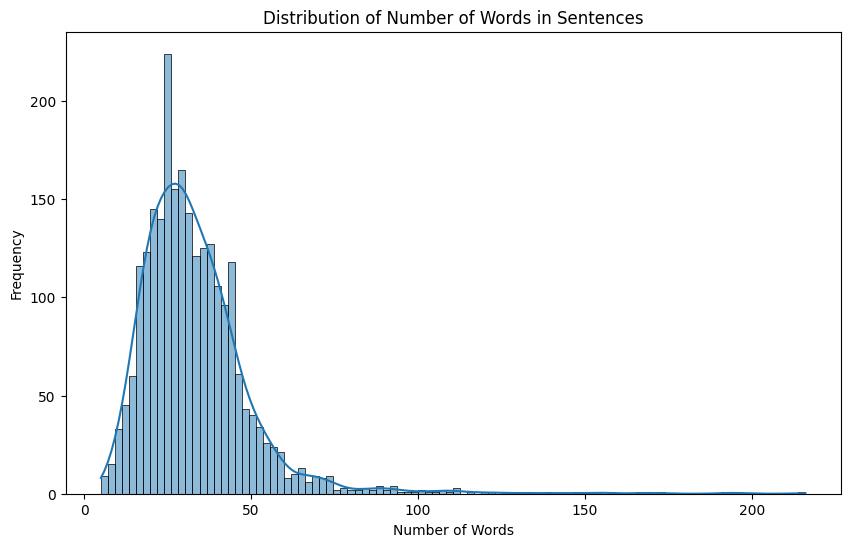

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the word lengths of each sentence because there still seem to be strangely long sentences with > 500 words
# Eventually do the truncation (or elemination?) step before everything else...
word_lengths = [len(sentence.split()) for sentence in sentences]

# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=100, kde=True)
plt.title('Distribution of Number of Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/srl_predictions_test_5.csv'
df_srl = pd.read_csv(path_to_csv)

## Now Extract most common verbs per agent and target
# Count the occurrences of each agent and target
agent_counts = df_srl['Agent'].value_counts().reset_index()
agent_counts.columns = ['Agent', 'Agent_Count']

target_counts = df_srl['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Target_Count']

# Merge the counts back into the original DataFrame
df_srl = df_srl.merge(agent_counts, on='Agent', how='left')
df_srl = df_srl.merge(target_counts, on='Target', how='left')

# Group by 'Agent' and 'Verb' to count the occurrences of each verb for each agent
agent_verb_counts = df_srl.groupby(['Agent', 'Verb', 'Agent_Count']).size().reset_index(name='Count')

# Do same for target
target_verb_counts = df_srl.groupby(['Target', 'Verb', 'Target_Count']).size().reset_index(name='Count')

# Sort the counts to find the most common verbs per agent and per target
most_common_verbs_per_agent = agent_verb_counts.sort_values(by=['Agent_Count', 'Count'], ascending=[False, False])
most_common_verbs_per_target = target_verb_counts.sort_values(by=['Target_Count', 'Count'], ascending=[False, False])

# Display the most common verbs per agent
print("Most common verbs per agent:")
print(most_common_verbs_per_agent.head(20))

# most common vrbs per target
print("most common verbs per target:")
print(most_common_verbs_per_target.head(20))

# combine the two frames
frames = [most_common_verbs_per_agent, most_common_verbs_per_target]
result = pd.concat(frames)

result.to_csv('/content/drive/MyDrive/Colab Notebooks/verbs_arg0_arg1_test5.csv', index=False)



Most common verbs per agent:
     Agent       Verb  Agent_Count  Count
646  Eskom        has        187.0      7
693  Eskom       said        187.0      7
664  Eskom       need        187.0      5
601  Eskom   building        187.0      4
673  Eskom      plans        187.0      4
657  Eskom       keep        187.0      3
659  Eskom       load        187.0      3
713  Eskom       uses        187.0      3
584  Eskom    alleged        187.0      2
586  Eskom      apply        187.0      2
596  Eskom      boost        187.0      2
611  Eskom  competing        187.0      2
618  Eskom   continue        187.0      2
626  Eskom    depends        187.0      2
639  Eskom   generate        187.0      2
653  Eskom  indicated        187.0      2
668  Eskom   operates        187.0      2
671  Eskom     paying        187.0      2
684  Eskom     reduce        187.0      2
690  Eskom   resorted        187.0      2
most common verbs per target:
     Target        Verb  Target_Count  Count
7832     to   

In [ ]:
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/srl_predictions_test_5.csv'
df_srl = pd.read_csv(path_to_csv)

# Here I want to change the cells respectively in the columns "Agent" and "Target" to the respective target word if the word (case-insensitive) appears in the cell.
# If more than one of the target words appears, don't do anything.
# Define the list of target words
target_words = ["government", "eskom", "union", "miners", "ramaphosa", "mantashe", "minister",
                "anc", "african national congress", "democratic alliance", "da",
                "president", "pcc", "commission", "cosatu", "numsa", "anglo",
                "glencore", "seriti", "exxaro", "intellidex", "sasol", "enel",
                "business unity", "boston consulting group", "bcg", "wwf", "greenpeace",
                "circular energy", "climate foundation", "association of artisanal",
                "groundwork", "just share", "wessa", "anadiba crisis committee", "transform rsa"]

# Function to find and replace target words
def replace_target_word(cell, target_words):
    matches = [word for word in target_words if word.lower() in str(cell).lower()]
    if len(matches) == 1:
        return matches[0]
    return cell

# Apply the function to "Agent" and "Target" columns
df_srl['Agent'] = df_srl['Agent'].apply(replace_target_word, args=(target_words,))
df_srl['Target'] = df_srl['Target'].apply(replace_target_word, args=(target_words,))


## Now Extract most common verbs per agent and target
# Count the occurrences of each agent and target
agent_counts = df_srl['Agent'].value_counts().reset_index()
agent_counts.columns = ['Agent', 'Agent_Count']

target_counts = df_srl['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Target_Count']

# Merge the counts back into the original DataFrame
df_srl = df_srl.merge(agent_counts, on='Agent', how='left')
df_srl = df_srl.merge(target_counts, on='Target', how='left')

# Group by 'Agent' and 'Verb' to count the occurrences of each verb for each agent
agent_verb_counts = df_srl.groupby(['Agent', 'Verb', 'Agent_Count']).size().reset_index(name='Count')

# Do same for target
target_verb_counts = df_srl.groupby(['Target', 'Verb', 'Target_Count']).size().reset_index(name='Count')

# Sort the counts to find the most common verbs per agent and per target
most_common_verbs_per_agent = agent_verb_counts.sort_values(by=['Agent_Count', 'Count'], ascending=[False, False])
most_common_verbs_per_target = target_verb_counts.sort_values(by=['Target_Count', 'Count'], ascending=[False, False])

# Display the most common verbs per agent
print("Most common verbs per agent:")
print(most_common_verbs_per_agent.head(20))

# most common vrbs per target
print("most common verbs per target:")
print(most_common_verbs_per_target.head(20))

# combine the two frames
frames = [most_common_verbs_per_agent, most_common_verbs_per_target]
result = pd.concat(frames)

result.to_csv('/content/drive/MyDrive/Colab Notebooks/verbs_arg0_arg1_test5_1.csv', index=False)

Most common verbs per agent:
      Agent         Verb  Agent_Count  Count
2497  eskom         said        364.0     21
2419  eskom          has        364.0     10
2450  eskom         need        364.0      6
2499  eskom         says        364.0      6
2464  eskom        plans        364.0      5
2334  eskom     building        364.0      4
2435  eskom         keep        364.0      4
2516  eskom      started        364.0      4
2522  eskom     supplies        364.0      4
2538  eskom         uses        364.0      4
2338  eskom          buy        364.0      3
2359  eskom  contributed        364.0      3
2406  eskom     generate        364.0      3
2408  eskom    generates        364.0      3
2436  eskom         lead        364.0      3
2439  eskom         load        364.0      3
2443  eskom         made        364.0      3
2482  eskom       reduce        364.0      3
2501  eskom      secured        364.0      3
2523  eskom       supply        364.0      3
most common verbs per targ

In [ ]:
## checking how many sentences, if I don't limit to target words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original articles:
0       AS WITH many a passion, one\'s earliest beginn...
1       Instead, business organisations, municipalitie...
2       Today\'s meeting of the Brazil, South Africa, ...
3       RECYCLED effluent from Gauteng will be used to...
4       Public enterprises committee members were this...
                              ...                        
1995    Rate hike to hinge on Eskom tariff Bank warns ...
1996    ECONOMIC WEEK AHEAD: Public wage deal settled,...
1997    Regulations stymie developments, says HCI CAPE...
1998    Nuclear build will power economic growth THERE...
1999    \'Too soon\' to assess SA on funding nuclear E...
Name: Article_Text, Length: 2000, dtype: object
Total number of sentences: 5487


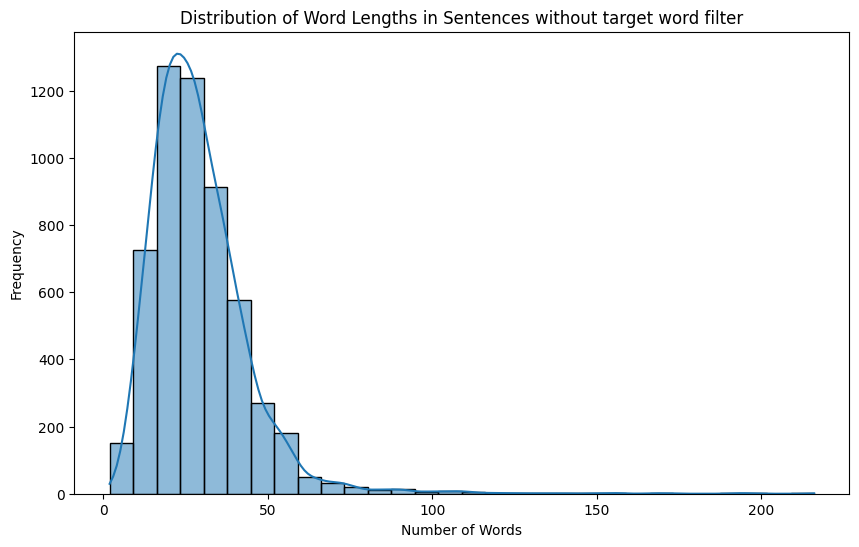

In [ ]:
import pandas as pd
import nltk
from tqdm import tqdm
from transformers import BertTokenizer # for avoiding this error: RuntimeError: The size of tensor a (843) must match the size of tensor b (512) at non-singleton dimension 1
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the CSV file
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
df = pd.read_csv(path_to_csv)

# Extract the "Article_Text" column for the first 5 entries
df_subset = df['Article_Text'].head(2000)

# Print the DataFrame of articles
print("Original articles:")
print(df_subset)

# Initialize an empty list to store sentences
sentences = []

# Define the target words
#target_words = ["government", "eskom", "union", "ramaphosa", "mantashe", "minister",
#                "anc", "african national congress", "democratic alliance", "da",
#                "president", "pcc", "commission", "cosatu", "numsa", "anglo",
#                "glencore", "seriti", "exxaro", "intellidex", "sasol", "enel",
#                "business unity", "boston consulting group", "bcg", "wwf", "greenpeace",
#                "circular energy", "climate foundation", "association of artisanal",
#                "groundwork", "just share", "wessa", "anadiba crisis committee", "transform rsa"]

# Tokenizer for checking sentence length
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to truncate sentences
#def truncate_sentence(sentence, max_length=512):
#    tokens = tokenizer.tokenize(sentence)
#    if len(tokens) > max_length:
#        tokens = tokens[:max_length]
#        sentence = tokenizer.convert_tokens_to_string(tokens)
#    return sentence



# Iterate over the text of the first 5 articles
for text in df_subset:
    # Split the text into sentences using NLTK's sent_tokenize function
    text_sentences = nltk.sent_tokenize(text)
    # Check each sentence for the presence of the target words
    for sentence in text_sentences:
        # Convert the sentence to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()
        # Check if the sentence contains the word "coal" and at least one of the target words
        if "coal" in sentence_lower: # and any(word in sentence_lower for word in target_words):
   #         truncated_sentence = truncate_sentence(sentence)
            sentences.append(sentence)
print(f"Total number of sentences: {len(sentences)}")

# Calculate the word lengths of each sentence because there still seem to be strangely long sentences with > 500 words
# Eventually do the truncation (or elemination?) step before everything else...
word_lengths = [len(sentence.split()) for sentence in sentences] # As we see there are 5487 sentences compared to around 2400 (3725 in updated list) sentences if we additionally constrain to target words.
# Therefore eventually think about not applying the filter and just do it ex-post (extract relevant actors?)

# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=30, kde=True)
plt.title('Distribution of Word Lengths in Sentences without target word filter')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original articles:
0       AS WITH many a passion, one\'s earliest beginn...
1       Instead, business organisations, municipalitie...
2       Today\'s meeting of the Brazil, South Africa, ...
3       RECYCLED effluent from Gauteng will be used to...
4       Public enterprises committee members were this...
                              ...                        
1995    Rate hike to hinge on Eskom tariff Bank warns ...
1996    ECONOMIC WEEK AHEAD: Public wage deal settled,...
1997    Regulations stymie developments, says HCI CAPE...
1998    Nuclear build will power economic growth THERE...
1999    \'Too soon\' to assess SA on funding nuclear E...
Name: Article_Text, Length: 2000, dtype: object
Total number of sentences: 3725


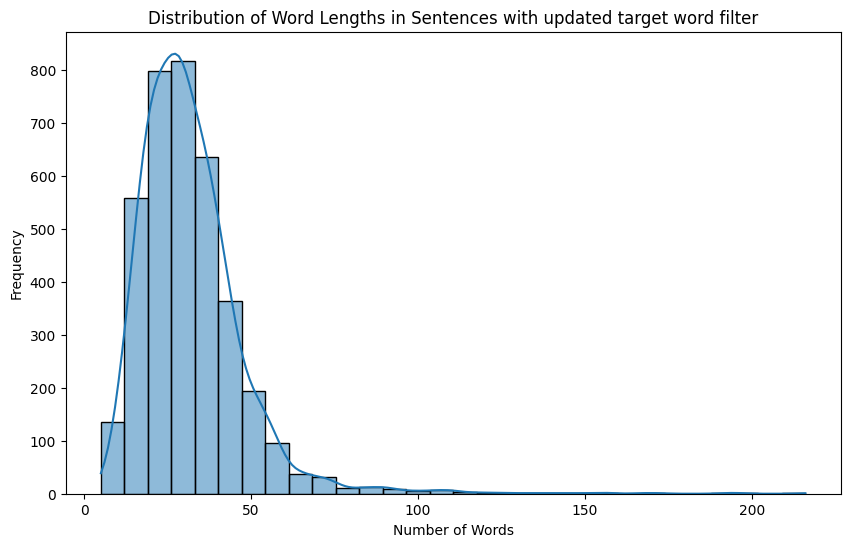

In [ ]:
# How many sentences with updated target word list?
import pandas as pd
import nltk
from tqdm import tqdm
from transformers import BertTokenizer # for avoiding this error: RuntimeError: The size of tensor a (843) must match the size of tensor b (512) at non-singleton dimension 1
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the CSV file
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/coal_data_filtered_nodup_cleaned3.csv'
df = pd.read_csv(path_to_csv)

# Extract the "Article_Text" column for the first 5 entries
df_subset = df['Article_Text'].head(2000)

# Print the DataFrame of articles
print("Original articles:")
print(df_subset)

# Initialize an empty list to store sentences
sentences = []

target_words = [
    "government", "eskom", "union", "miners", "ramaphosa", "mantashe", "minister",
    "anc", "african national congress", "democratic alliance", "da",
    "president", "pcc", "commission", "cosatu", "numsa", "anglo",
    "glencore", "seriti", "exxaro", "intellidex", "sasol", "enel",
    "business unity", "boston consulting group", "bcg", "wwf", "greenpeace",
    "circular energy", "climate foundation", "association of artisanal",
    "groundwork", "just share", "wessa", "amadiba crisis committee", "transform rsa",
    "ipg partner group", "world bank", "brics countries", "civil society",
    "germany", "france", "uk", "united states", "us", "ipg",
    "trade unions", "coal industry", "mining companies", "soes",
    "renewable energy industry", "business representatives", "banks",
    "international investors", "independent power producers", "south32",
    "bhb", "minerals council south africa", "energy intensive users group",
    "department of mineral resources and energy", "national business initiative",
    "african rainbow", "universal", "canyon", "wip", "people summit",
    "oceans not oil", "eastern cape environmental network", "zero carbon change",
    "south african energy forum", "futuregrowth", "shell", "mintek",
    "productivity sa", "africa oil week", "old mutual investment group", "absa",
    "nedbank", "thungela resources", "num", "economic freedom fighters", "department"
]

# Tokenizer for checking sentence length
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Iterate over the text of the first 5 articles
for text in df_subset:
    # Split the text into sentences using NLTK's sent_tokenize function
    text_sentences = nltk.sent_tokenize(text)
    # Check each sentence for the presence of the target words
    for sentence in text_sentences:
        # Convert the sentence to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()
        # Check if the sentence contains the word "coal" and at least one of the target words
        if "coal" in sentence_lower and any(word in sentence_lower for word in target_words):
            sentences.append(sentence)

print(f"Total number of sentences: {len(sentences)}")

# Calculate the word lengths of each sentence because there still seem to be strangely long sentences with > 500 words
# Eventually do the truncation (or elemination?) step before everything else...
word_lengths = [len(sentence.split()) for sentence in sentences] # As we see there are 5487 sentences compared to around 2400 sentences if we additionally constrain to target words

# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=30, kde=True)
plt.title('Distribution of Word Lengths in Sentences with updated target word filter')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


# Grouping the Actors

List of actors that potentially play a role in ZA's coal discourse, based on Manych et al. (2023), Hanto et al. (2022) (two paper), Baker et al. (2014), Baker et al. (2015). As well some general papers? Mainly based on Hanto et al. (2020)

Relevant actors:

Political:
*   President
*   Political Parties (ANC and DA)
*   National government
*   Government departments - the ministries
*   Municipalities
*   Provincial Government
*   Local Government

International Political (Own addition)
*   IPG partner group
*   World bank, etc.
*   Brics countries
*   Other

Sociental:
*   Civil society?
*   National/International NGOa
*   Think tanks
*   Universities
*   Trade unions
*   Coal industry
*   Mining companies
*   SOEs (Eskom and Sasol)
*   Renewable energy industry
*   Business reps
*   Banks
*   International Investors
*   Independent Power Producers (IPP)



Additional actors fround from literature and JT-paper:
- from "from MEC to a just transition?" by Baker (2024)
  - Actors of Minerals-Energy Complex: South32, BHB Biliton,
  Minerals council south africa (MCSA), Energy intesive users group (EIUG),
  Department of mineral resources and energy (DMRE), National business initiative (NBI), African Rainbow, Universal, Canyon, Wip

- From JT-paper:
  - People summit, Oceans not Oil, wessa, eastern cape env. network
  - Zero carbon change, South african energy forum (saef), futuregrowth, shell, mintek, Productivity sa, africa oil week, old mutual investment group, absa, nedbank, thungela resources
  - num (nat. union of miners)
  - Economic freedom fighters (EFF)
  - Department


